# Activity 1


### Joshua Hartzfeld
### CSE 4020

#### Task 1:


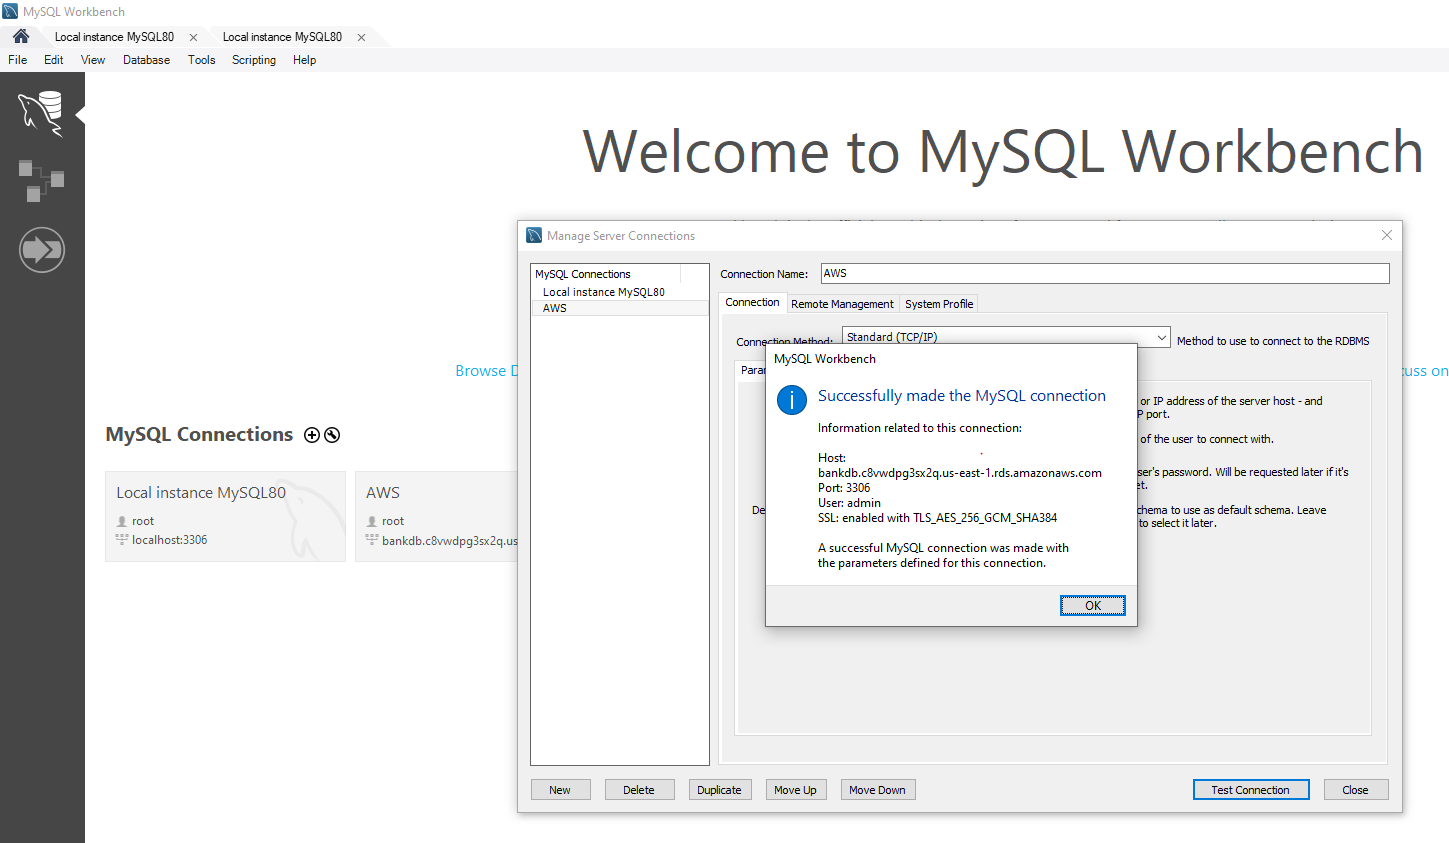

#### Task 3:

In [1]:
# Wouldnt reccomend running because it will throw error since the DB is already made, go to next code block to check for bank DB


import mysql.connector

#connection made ignore my password
db = mysql.connector.connect(host='bankdb.c8vwdpg3sx2q.us-east-1.rds.amazonaws.com', user='admin',password='-=ZF=-6969')

#setting up channel and opening file
cursor = db.cursor()
DDLFile = open('hw1 ddl.sql', encoding='utf-8')

#executes each line straight too AWS DB "bank"
for line in DDLFile:
    cursor.execute(line)


In [2]:
# looking for "bank"
db = mysql.connector.connect(host='bankdb.c8vwdpg3sx2q.us-east-1.rds.amazonaws.com', user='admin',password='-=ZF=-6969')
cursor = db.cursor()
cursor.execute("SHOW DATABASES")
for x in cursor:
    print(x)

('bank',)
('information_schema',)
('mysql',)
('performance_schema',)


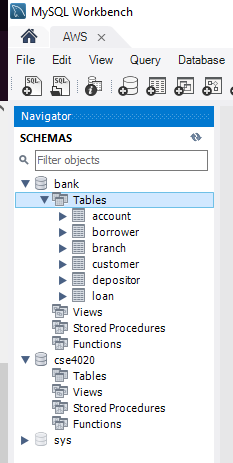 
### Resulting View in Workbench after code is run (workbench is connected to AWS)

#### Task 4:

In [3]:
from IPython.display import display , Markdown
# connects and checks DDL information for each table
db = mysql.connector.connect(host='bankdb.c8vwdpg3sx2q.us-east-1.rds.amazonaws.com', user='admin',password='-=ZF=-6969')
cursor = db.cursor()
cursor.execute("USE bank")
cursor.execute("SHOW CREATE TABLE branch")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))
    
cursor.execute("SHOW CREATE TABLE account")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))
    
cursor.execute("SHOW CREATE TABLE borrower")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))
    
cursor.execute("SHOW CREATE TABLE customer")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))
    
cursor.execute("SHOW CREATE TABLE depositor")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))
     
cursor.execute("SHOW CREATE TABLE loan")
for x in cursor:
    print(x[1])
    display(Markdown(x[1]))


CREATE TABLE `branch` (
  `branch_name` varchar(15) NOT NULL,
  `branch_city` varchar(15) DEFAULT NULL,
  `assets` int DEFAULT NULL,
  PRIMARY KEY (`branch_name`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `branch` (
  `branch_name` varchar(15) NOT NULL,
  `branch_city` varchar(15) DEFAULT NULL,
  `assets` int DEFAULT NULL,
  PRIMARY KEY (`branch_name`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `account` (
  `account_number` int NOT NULL,
  `branch_name` varchar(15) DEFAULT NULL,
  `balance` int DEFAULT NULL,
  PRIMARY KEY (`account_number`),
  KEY `branch_name` (`branch_name`),
  CONSTRAINT `account_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),
  CONSTRAINT `account_chk_1` CHECK ((`balance` >= 0))
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `account` (
  `account_number` int NOT NULL,
  `branch_name` varchar(15) DEFAULT NULL,
  `balance` int DEFAULT NULL,
  PRIMARY KEY (`account_number`),
  KEY `branch_name` (`branch_name`),
  CONSTRAINT `account_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`),
  CONSTRAINT `account_chk_1` CHECK ((`balance` >= 0))
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `borrower` (
  `customer_name` varchar(20) NOT NULL,
  `loan_number` int NOT NULL,
  PRIMARY KEY (`customer_name`,`loan_number`),
  KEY `loan_number` (`loan_number`),
  CONSTRAINT `borrower_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`),
  CONSTRAINT `borrower_ibfk_2` FOREIGN KEY (`loan_number`) REFERENCES `loan` (`loan_number`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `borrower` (
  `customer_name` varchar(20) NOT NULL,
  `loan_number` int NOT NULL,
  PRIMARY KEY (`customer_name`,`loan_number`),
  KEY `loan_number` (`loan_number`),
  CONSTRAINT `borrower_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `customer` (`customer_name`),
  CONSTRAINT `borrower_ibfk_2` FOREIGN KEY (`loan_number`) REFERENCES `loan` (`loan_number`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `customer` (
  `customer_name` varchar(20) NOT NULL,
  `customer_street` varchar(30) DEFAULT NULL,
  `customer_city` varchar(15) DEFAULT NULL,
  PRIMARY KEY (`customer_name`),
  CONSTRAINT `customer_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `depositor` (`customer_name`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `customer` (
  `customer_name` varchar(20) NOT NULL,
  `customer_street` varchar(30) DEFAULT NULL,
  `customer_city` varchar(15) DEFAULT NULL,
  PRIMARY KEY (`customer_name`),
  CONSTRAINT `customer_ibfk_1` FOREIGN KEY (`customer_name`) REFERENCES `depositor` (`customer_name`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `depositor` (
  `customer_name` varchar(20) NOT NULL,
  `account_number` int NOT NULL,
  PRIMARY KEY (`customer_name`,`account_number`),
  KEY `account_number` (`account_number`),
  CONSTRAINT `depositor_ibfk_1` FOREIGN KEY (`account_number`) REFERENCES `account` (`account_number`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `depositor` (
  `customer_name` varchar(20) NOT NULL,
  `account_number` int NOT NULL,
  PRIMARY KEY (`customer_name`,`account_number`),
  KEY `account_number` (`account_number`),
  CONSTRAINT `depositor_ibfk_1` FOREIGN KEY (`account_number`) REFERENCES `account` (`account_number`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci

CREATE TABLE `loan` (
  `loan_number` int NOT NULL,
  `branch_name` varchar(15) DEFAULT NULL,
  `amount` int DEFAULT NULL,
  PRIMARY KEY (`loan_number`),
  KEY `branch_name` (`branch_name`),
  CONSTRAINT `loan_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`) ON DELETE SET NULL,
  CONSTRAINT `loan_chk_1` CHECK ((`amount` >= 0))
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


CREATE TABLE `loan` (
  `loan_number` int NOT NULL,
  `branch_name` varchar(15) DEFAULT NULL,
  `amount` int DEFAULT NULL,
  PRIMARY KEY (`loan_number`),
  KEY `branch_name` (`branch_name`),
  CONSTRAINT `loan_ibfk_1` FOREIGN KEY (`branch_name`) REFERENCES `branch` (`branch_name`) ON DELETE SET NULL,
  CONSTRAINT `loan_chk_1` CHECK ((`amount` >= 0))
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci